In [1]:
import dataframeanalyzer as dfa
import pandas as pd
import seaborn as sns
%matplotlib inline

In [2]:
analyzer=dfa.dataframeanalayzer()
whale_returns_df=analyzer.loadcvstodataframe('Resources/whale_returns.csv','Date')
algo_returns_df=analyzer.loadcvstodataframe('Resources/algo_returns.csv','Date')
sp500_history_df=analyzer.loadcvstodataframe('Resources/sp500_history.csv','Date')

In [3]:
# Reading whale returns
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [4]:
# Count nulls
analyzer.nullcount(whale_returns_df)

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [5]:
 # Drop nulls
analyzer.dropnulls(whale_returns_df)
analyzer.nullcount(whale_returns_df)

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

In [6]:
# Reading algorithmic returns
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [7]:
analyzer.nullcount(algo_returns_df)

Algo 1    0
Algo 2    6
dtype: int64

In [8]:
analyzer.dropnulls(algo_returns_df)
analyzer.nullcount(algo_returns_df)

Algo 1    0
Algo 2    0
dtype: int64

In [9]:
# Reading S&P 500 Closing Prices
sp500_history_df.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [10]:
sp500_history_df.dtypes

Close    object
dtype: object

In [11]:
analyzer.removecurrencysign(sp500_history_df,'Close')
analyzer.changecolumndatatype(sp500_history_df,'Close','float')
sp500_history_df.dtypes

Close    float64
dtype: object

In [12]:
sp500_daily_returns=analyzer.calculatedailyreturns(sp500_history_df)
sp500_daily_returns.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [13]:
analyzer.dropnulls(sp500_daily_returns)
sp500_daily_returns.head()

,Close
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [14]:
columnstorename={'Close':'S&P 500'}
analyzer.renamecolumns(sp500_daily_returns,columnstorename)
sp500_daily_returns.head()

,S&P 500
Date,
2019-04-22,-0.008764
2019-04-18,-0.001011
2019-04-17,-0.001577
2019-04-16,0.002279
2019-04-15,-0.000509


In [15]:
# Calculate Daily Returns
dataframes=[whale_returns_df,algo_returns_df,sp500_daily_returns]
analyzer.createportfolio(dataframes)
analyzer.portfolio

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


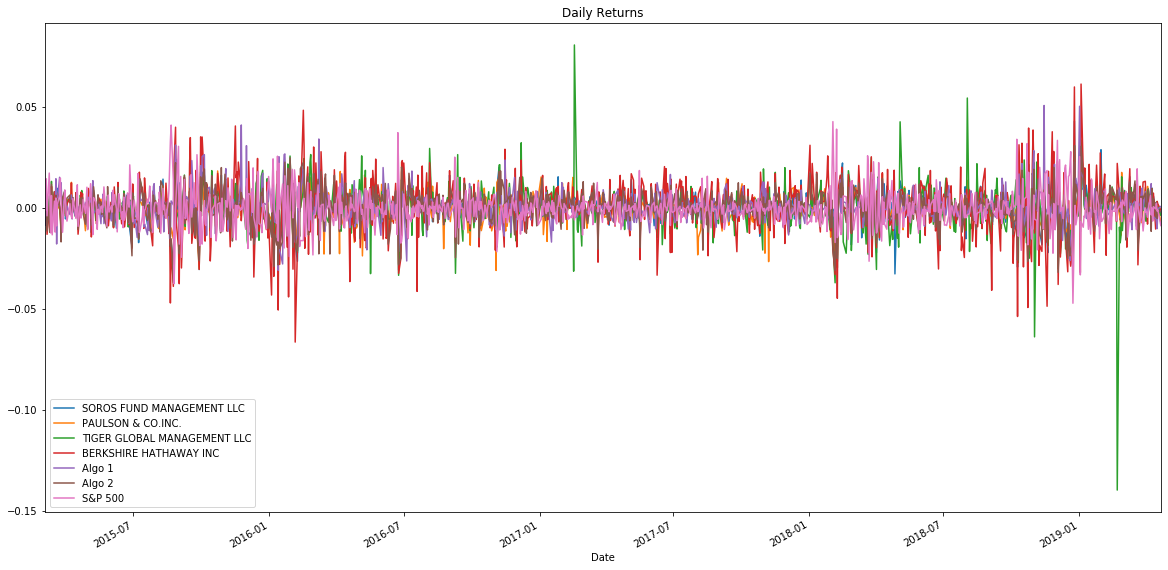

In [16]:
# Plot daily returns
analyzer.portfolio.plot(figsize=(20,10),title='Daily Returns')

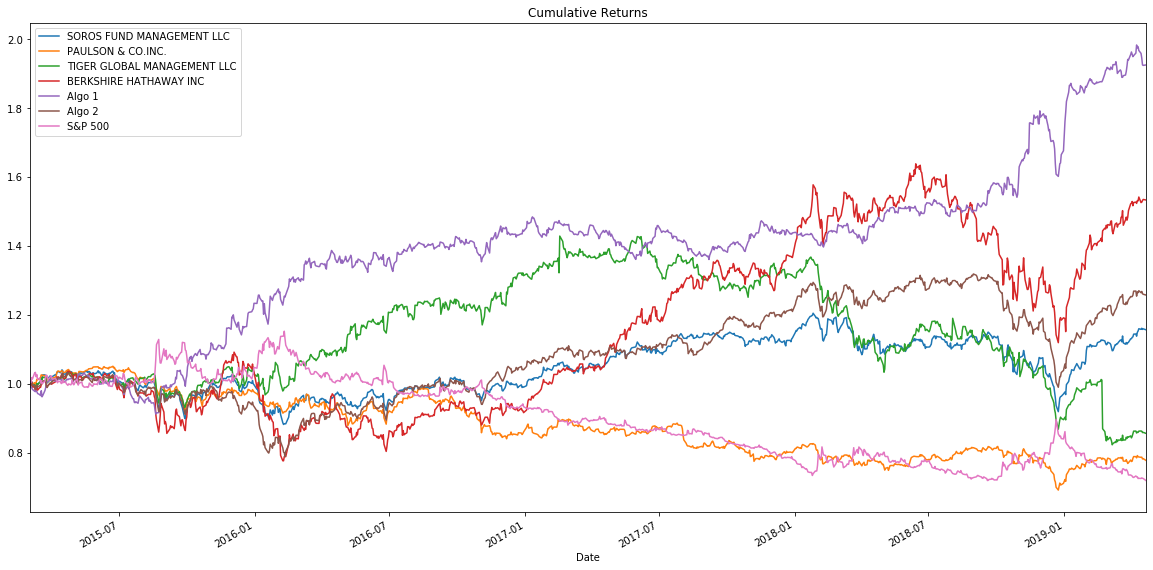

In [17]:
# Plot cumulative returns
cumulativedata=analyzer.calculatecumulativereturns(analyzer.portfolio)
cumulativedata.plot(figsize=(20,10),title='Cumulative Returns')

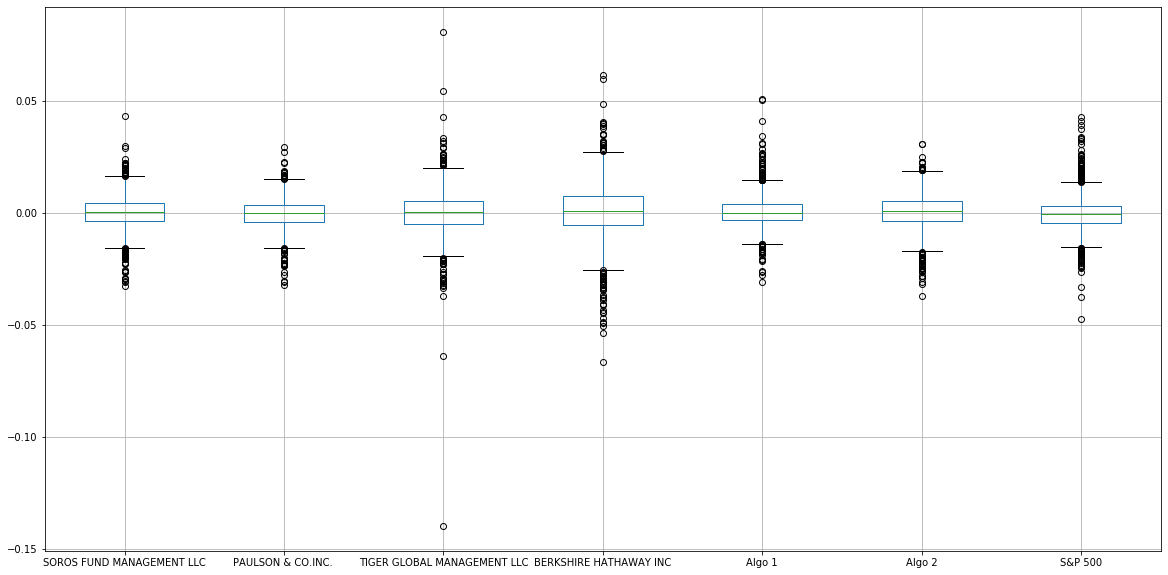

In [18]:
# Box plot to visually show risk
analyzer.portfolio.boxplot(figsize=(20,10))

In [19]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. Which portfolios are riskier than the S&P 500?
calculatedstd=analyzer.calculatestandarddevation(analyzer.portfolio)
calculatedstd

PAULSON & CO.INC.              0.007026
Algo 1                         0.007623
SOROS FUND MANAGEMENT LLC      0.007896
Algo 2                         0.008341
S&P 500                        0.008587
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
dtype: float64

In [20]:
calculatedstd=analyzer.calculatestandarddevation(analyzer.portfolio,False)
calculatedstd

BERKSHIRE HATHAWAY INC         0.012919
TIGER GLOBAL MANAGEMENT LLC    0.010897
S&P 500                        0.008587
Algo 2                         0.008341
SOROS FUND MANAGEMENT LLC      0.007896
Algo 1                         0.007623
PAULSON & CO.INC.              0.007026
dtype: float64

In [21]:
# Determine which portfolios are riskier than the S&P 500
analyzer.determineriskyportfolio(calculatedstd, 'S&P 500')

BERKSHIRE HATHAWAY INC          True
TIGER GLOBAL MANAGEMENT LLC     True
S&P 500                        False
Algo 2                         False
SOROS FUND MANAGEMENT LLC      False
Algo 1                         False
PAULSON & CO.INC.              False
dtype: bool

In [22]:
# Calculate the annualized standard deviation (252 trading days)
annualizedstd=analyzer.calculateannulizedstandarddevation(calculatedstd)
annualizedstd

PAULSON & CO.INC.              0.111527
Algo 1                         0.121006
SOROS FUND MANAGEMENT LLC      0.125348
Algo 2                         0.132413
S&P 500                        0.136313
TIGER GLOBAL MANAGEMENT LLC    0.172989
BERKSHIRE HATHAWAY INC         0.205079
dtype: float64

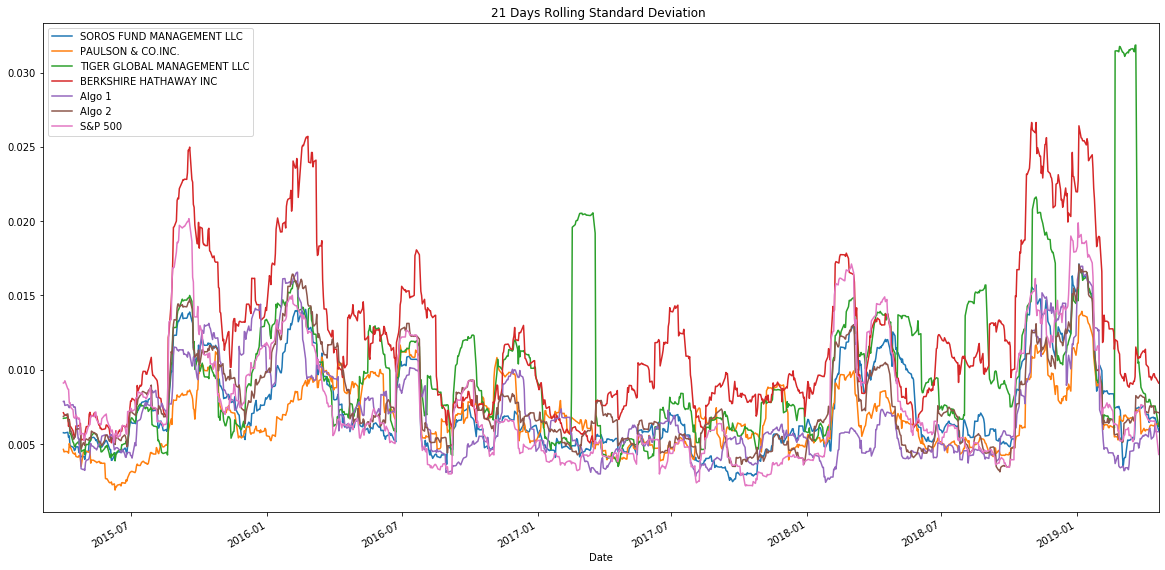

In [23]:
# Calculate and plot the rolling standard deviation for the S&PP 500 using a 21 day window
rollingstd=analyzer.calculaterollingstandarddeviation(analyzer.portfolio,21)
rollingstd.plot(figsize=(20,10),title='21 Days Rolling Standard Deviation ')

In [24]:
# Correlation
correlateddata=analyzer.calculatecorrelation(analyzer.portfolio)
correlateddata

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699823,0.561040,0.754157,0.320901,0.826730,0.000574
PAULSON & CO.INC.,0.699823,1.000000,0.434308,0.545451,0.268631,0.678085,0.013549
TIGER GLOBAL MANAGEMENT LLC,0.561040,0.434308,1.000000,0.424125,0.164114,0.507160,-0.001505
BERKSHIRE HATHAWAY INC,0.754157,0.545451,0.424125,1.000000,0.291678,0.687756,-0.013856
Algo 1,0.320901,0.268631,0.164114,0.291678,1.000000,0.287852,-0.033963
Algo 2,0.826730,0.678085,0.507160,0.687756,0.287852,1.000000,-0.002192
S&P 500,0.000574,0.013549,-0.001505,-0.013856,-0.033963,-0.002192,1.000000


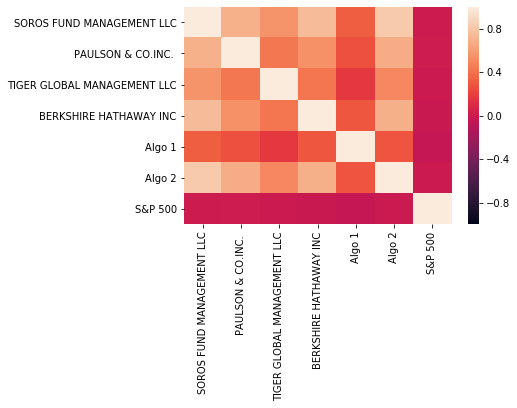

In [25]:
sns.heatmap(correlateddata,vmin=-1,vmax=1)

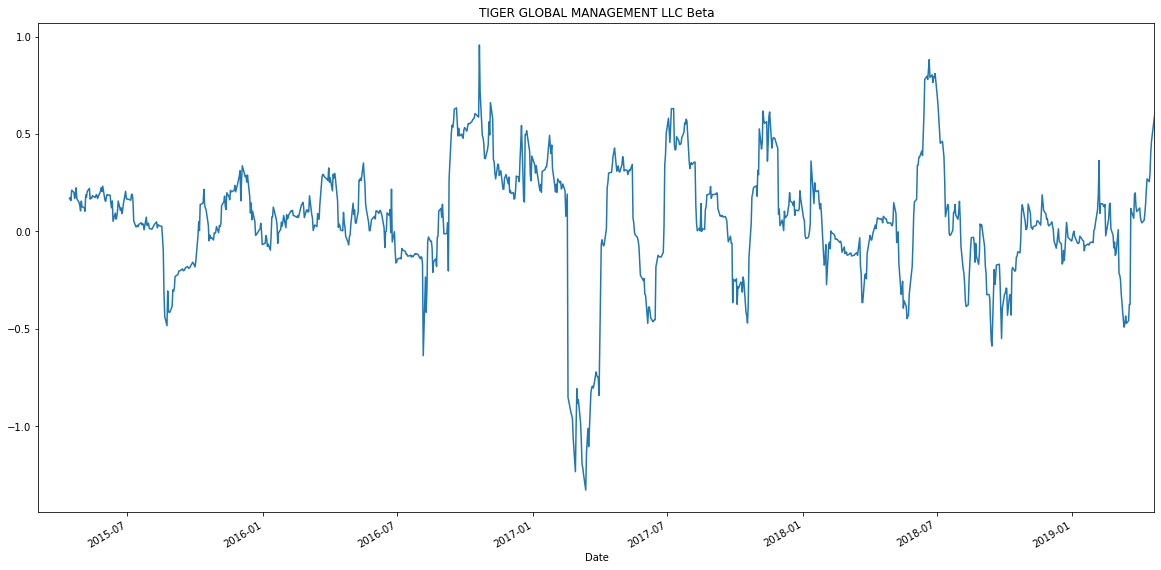

In [26]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
calc_beta=analyzer.calculatebeta(analyzer.portfolio,'TIGER GLOBAL MANAGEMENT LLC','S&P 500',30)
calc_beta.plot(figsize=(20,10),title='TIGER GLOBAL MANAGEMENT LLC Beta')

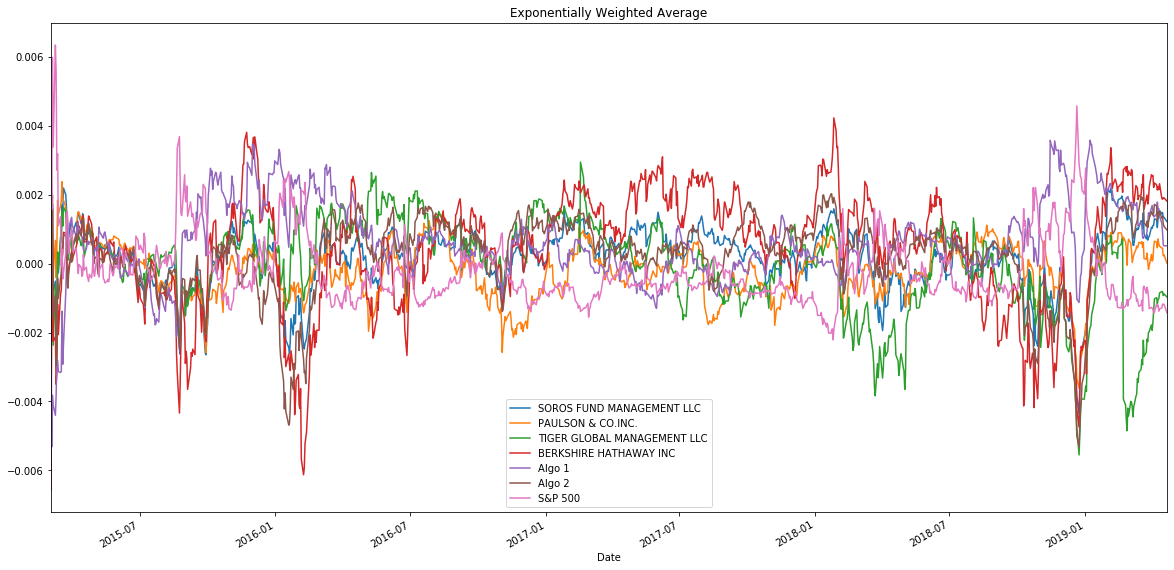

In [27]:
#Exponentially Weighted Average
ewm_data=analyzer.calculateexpotentialweightedaverage(analyzer.portfolio, 21)
ewm_data.plot(figsize=(20,10),title='Exponentially Weighted Average')


In [28]:
# Annualzied Sharpe Ratios
sharpieratiodata=analyzer.calculatesharpieratio(analyzer.portfolio)
sharpieratiodata

SOROS FUND MANAGEMENT LLC      0.342894
PAULSON & CO.INC.             -0.491422
TIGER GLOBAL MANAGEMENT LLC   -0.130186
BERKSHIRE HATHAWAY INC         0.606743
Algo 1                         1.369589
Algo 2                         0.484334
S&P 500                       -0.518582
dtype: float64

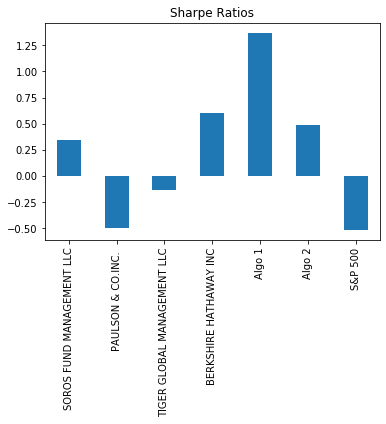

In [29]:
# Plot sharpe ratios
sharpieratiodata.plot(kind="bar", title="Sharpe Ratios")

In [30]:
# Read the first stock
googhistorical_df=analyzer.loadcvstodataframe('Resources/goog_historical.csv','Trade DATE')
aaplhistorical_df=analyzer.loadcvstodataframe('Resources/aapl_historical.csv','Trade DATE')
costhistorical_df=analyzer.loadcvstodataframe('Resources/cost_historical.csv','Trade DATE')

In [31]:
googhistorical_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [32]:
aaplhistorical_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75


In [33]:
costhistorical_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62


In [34]:
dfs=[googhistorical_df,aaplhistorical_df,costhistorical_df]
stocks_df=analyzer.concatdataframes(dfs,'rows')
stocks_df.head()

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40


In [35]:
# Pivot the Data so that the stock tickers are the columns, the dates are the index, and the 
# values are the closing prices
stocks_df.reset_index()
stocks_df=stocks_df.pivot_table(values='NOCP',index='Trade DATE',columns='Symbol')
stocks_df.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [36]:
stocks_returns=analyzer.calculatedailyreturns(stocks_df)
stocks_returns.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


In [37]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
stock_weighted_returns=analyzer.calculateweightedreturns(stocks_returns,weights)
stock_weighted_returns.index.rename('Date',inplace=True)
stock_weighted_returns.head()

Date
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

In [38]:
combined_portfolio=analyzer.concatdataframes([analyzer.portfolio,stock_weighted_returns],'columns')
columnstorename={0:'Custom'}
analyzer.renamecolumns(combined_portfolio,columnstorename)
combined_portfolio.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
Date,,,,,,,,
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509,0.007522
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,-0.001011,0.001545
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,-0.008764,0.001217


In [39]:
# Only compare dates where the new, custom portfolio has dates

In [40]:
# Risk
combined_std=analyzer.calculatestandarddevation(combined_portfolio,False)
combined_std

BERKSHIRE HATHAWAY INC         0.015579
TIGER GLOBAL MANAGEMENT LLC    0.014671
Custom                         0.013331
S&P 500                        0.009605
SOROS FUND MANAGEMENT LLC      0.009248
Algo 2                         0.008788
Algo 1                         0.008437
PAULSON & CO.INC.              0.007366
dtype: float64

In [41]:
combined_annualized_std=analyzer.calculateannulizedstandarddevation(combined_std,sortascending=False)
combined_annualized_std

BERKSHIRE HATHAWAY INC         0.247305
TIGER GLOBAL MANAGEMENT LLC    0.232898
Custom                         0.211627
S&P 500                        0.152469
SOROS FUND MANAGEMENT LLC      0.146812
Algo 2                         0.139499
Algo 1                         0.133927
PAULSON & CO.INC.              0.116928
dtype: float64

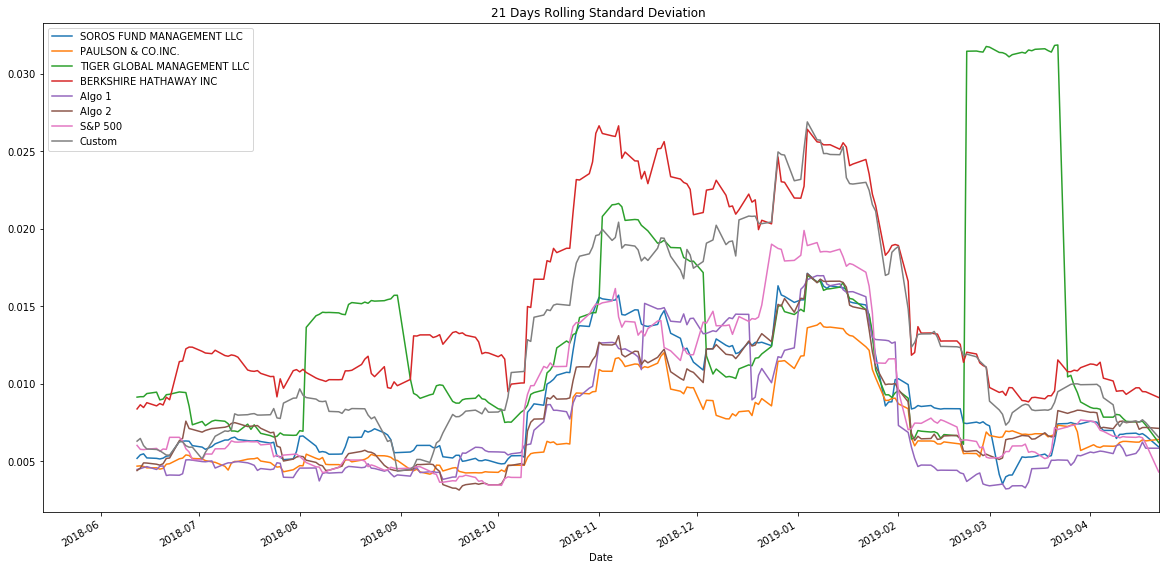

In [42]:
combined_rolling_std=analyzer.calculaterollingstandarddeviation(combined_portfolio,21)
combined_rolling_std.plot(figsize=(20,10),title='21 Days Rolling Standard Deviation ')

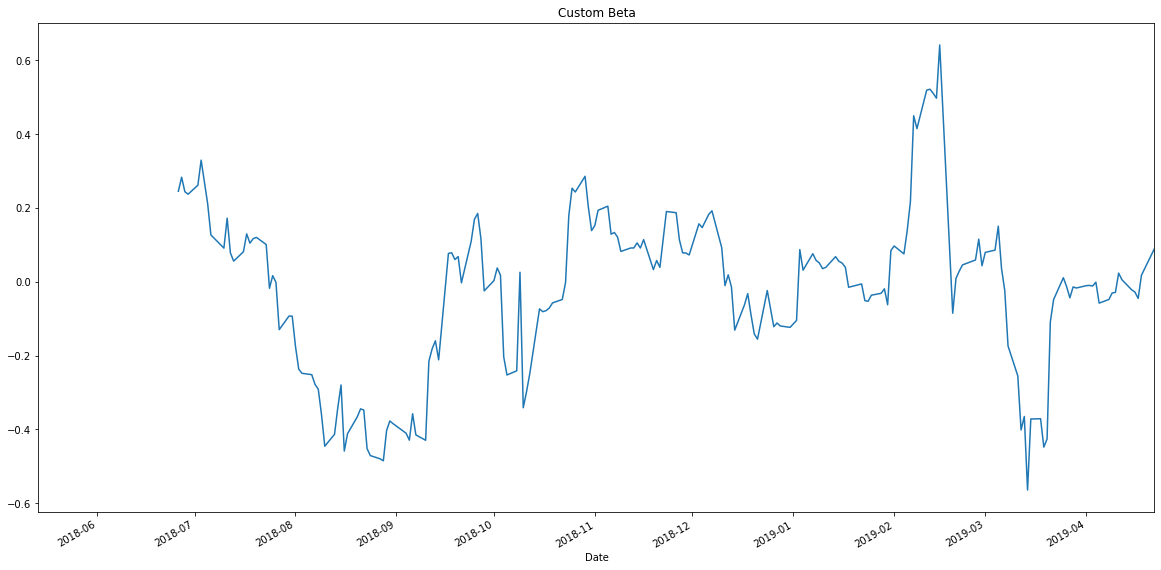

In [54]:
# Beta
combined_portfolio.sort_index(inplace=True)
custom_beta=analyzer.calculatebeta(combined_portfolio,'Custom','S&P 500',31)
custom_beta.plot(figsize=(20,10),title='Custom Beta')

In [44]:
# Annualzied Sharpe Ratios
combined_sharpie_ratiodata=analyzer.calculatesharpieratio(combined_portfolio)
combined_sharpie_ratiodata

SOROS FUND MANAGEMENT LLC      0.380007
PAULSON & CO.INC.              0.227577
TIGER GLOBAL MANAGEMENT LLC   -1.066635
BERKSHIRE HATHAWAY INC         0.103006
Algo 1                         2.001260
Algo 2                         0.007334
S&P 500                       -0.427676
Custom                         0.876152
dtype: float64

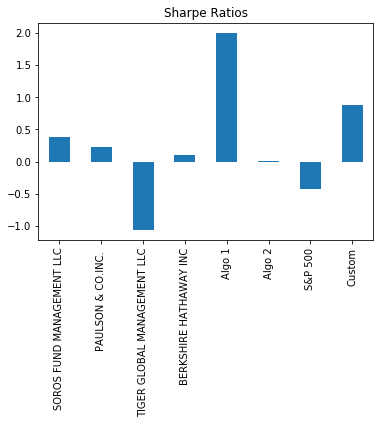

In [45]:
# Visualize the sharpe ratios as a bar plot
combined_sharpie_ratiodata.plot(kind="bar", title="Sharpe Ratios")

In [46]:
combined_corr=analyzer.calculatecorrelation(combined_portfolio)
combined_corr

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.791802,0.477844,0.816197,0.336909,0.862583,-0.028256,0.732548
PAULSON & CO.INC.,0.791802,1.000000,0.484869,0.650390,0.360727,0.783865,-0.059862,0.643828
TIGER GLOBAL MANAGEMENT LLC,0.477844,0.484869,1.000000,0.324306,0.113671,0.408402,0.005881,0.390961
BERKSHIRE HATHAWAY INC,0.816197,0.650390,0.324306,1.000000,0.325985,0.782054,-0.038832,0.800558
Algo 1,0.336909,0.360727,0.113671,0.325985,1.000000,0.364457,-0.054478,0.260331
Algo 2,0.862583,0.783865,0.408402,0.782054,0.364457,1.000000,-0.042540,0.739020
S&P 500,-0.028256,-0.059862,0.005881,-0.038832,-0.054478,-0.042540,1.000000,0.005603
Custom,0.732548,0.643828,0.390961,0.800558,0.260331,0.739020,0.005603,1.000000


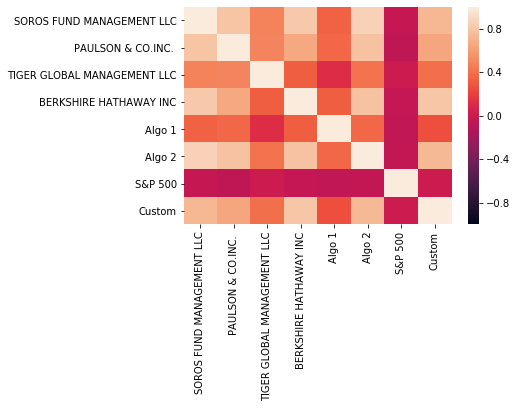

In [47]:
sns.heatmap(combined_corr,vmin=-1,vmax=1)